
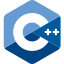
<br>

<div style="text-align:center; font-size:200%;">
 <b>Array Grundlagen</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 08 Array Grundlagen.ipynb -->
<!-- slides/module_140_collections/topic_110_array_basics.cpp -->


# Arrays in C++

- Zusammenhängender Speicherbereich
- Speichert Elemente des gleichen Datentyps
- Feste Größe, zur Kompilierzeit bestimmt
- Indizierung beginnt bei 0


## Definition von Arrays

- Syntax: `T name[size]`.
- Größe ist Teil des Typs, muss zur Kompilierzeit bekannt sein.
- Definition mit oder ohne Initialwerte möglich.
- Lokale Arrays werden auf dem Stack gespeichert.


### Ohne Initialwerte

- Größe muss angegeben werden.
- Elemente werden nicht initialisiert.

In [ ]:
int numbers[5];


### Mit Initialwerten

- Initialwerte als Initialisierungsliste angeben.
- Größe wird automatisch bestimmt.

In [ ]:
int numbers[]{1, 2, 3, 4, 5};


### Teilweise Initialisierung

- Nicht alle Werte müssen angegeben werden.
- In diesem Fall muss die Größe angegeben werden.
- Restliche Elemente werden automatisch mit 0 initialisiert, wenn weniger
  Werte angegeben werden.

In [ ]:
// First three elements initialized, others set to 0
int numbers[5]{1, 2, 3};

In [ ]:
int numbers[5]{};


## Zugriff auf Elemente

- Zugriff auf Elemente mittels Index.
- Syntax: `array[index]`.
- Indizes beginnen bei 0.
- Zugriff auf nicht existierende Elemente führt zu undefiniertem Verhalten.
- Zugriff auf Elemente ist schnell.

In [ ]:
int first_number = numbers[0];

In [ ]:
numbers[1] = 42;


## Modifikation von Arrays

- Es gibt keine Operationen zur Modifikation des gesamten Arrays.
- Z.B. `array_1 = array_2` ist nicht möglich.


## Iteration über Arrays

- Schleifen zur Iteration über Elemente:
  - Range-based for loop
  - Indexierte for-Schleife
- Range-based for loop immer verwenden, wenn möglich.


### Range-based For Loop

- Iteriert über alle Elemente eines Arrays.
- Syntax: `for (T element : array) { ... }`

In [ ]:
#include <iostream>

In [ ]:
for (int number : numbers) {
    std::cout << number << " ";
}


### Indexierte For-Schleife

- Iteriert über alle Indizes eines Arrays.
- Zugriff auf Elemente mittels Index.
- Syntax: `for (std::size_t i{0}; i < size; ++i) { ... }`
- Problem: Größe muss bekannt sein.

In [ ]:
for (std::size_t i{0}; i < 5; ++i) {
    std::cout << numbers[i] << " ";
}


## Übergeben von Arrays als Funktionsargumenten

- Array-Typen können als Parametertypen verwendet werden.
- Aber: Arrays können nicht als Wert übergeben werden.
- Werden als Zeiger behandelt.

In [ ]:
// void print_array_5(int arr[5])
// {
//     for (int elt : arr) {
//         std::cout << elt << " ";
//     }
// }

In [ ]:
void print_array_5(int arr[5])
{
    for (std::size_t i{0}; i < 5; ++i) {
        std::cout << arr[i] << " ";
    }
}

In [ ]:
int numbers[]{1, 2, 3, 4, 5};

In [ ]:
print_array_5(numbers);

In [ ]:
void inc_array_5(int arr[5])
{
    for (std::size_t i{0}; i < 5; ++i) {
        ++arr[i];
    }
}

In [ ]:
inc_array_5(numbers);
print_array_5(numbers);


- Typ `array[]` ist "unvollständiger Typ."
- Wird beim Funktionsaufruf wie ein Zeiger behandelt.
- Größe des Arrays geht verloren.
  - Sentinel-Wert
  - Größe des Arrays als zusätzlicher Parameter

In [ ]:
void print_array_incomplete(int arr[], std::size_t size)
{
    for (std::size_t i{0}; i < size; ++i) {
        std::cout << arr[i] << " ";
    }
}

In [ ]:
int numbers[]{1, 2, 3, 4, 5};

In [ ]:
print_array_incomplete(numbers, 5);


- Ein Array kann implizit in einen Zeiger auf das erste Element konvertiert
  werden ("decay").
- Größe des Arrays geht verloren.

In [ ]:
void print_array(int* arr, std::size_t size)
{
    for (std::size_t i{0}; i < size; ++i) {
        std::cout << arr[i] << " ";
    }
}

In [ ]:
int numbers[]{1, 2, 3, 4, 5};

In [ ]:
print_array(numbers, 5);


## Arrays und Zeiger

- Arrays und Zeiger sind eng miteinander verwandt.
- Arrays können implizit in Zeiger konvertiert werden.
- Zeiger unterstützen Addition und Subtraktion.

In [ ]:
numbers[0]

In [ ]:
&numbers[0] == numbers

In [ ]:
&numbers[1] == numbers + 1

In [ ]:
std::cout << (numbers[1] == *(numbers + 1));

In [ ]:
&numbers[2] == numbers + 2

In [ ]:
numbers + 2 == 2 + numbers

In [ ]:
2[numbers]


## Mini-Workshop: Arrays

- Schreiben Sie eine Funktion `max()`, die das größte Element eines Arrays
  von `unsigned int`-Werten zurückgibt.

In [ ]:
unsigned max(const unsigned* arr, std::size_t size)
{
    unsigned result{0};
    for (std::size_t i{0}; i < size; ++i) {
        if (arr[i] > result) {
            result = arr[i];
        }
    }
    return result;
}

In [ ]:
unsigned values[]{1, 8, 3, 5, 2, 9, 4, 7, 6};

In [ ]:
max(values, 9)


- Schreiben Sie eine Funktion `add()`, die zwei Arrays der gleichen Länge
  elementweise addiert.
- Welche Argumente müssen Sie an die Funktion übergeben?

In [ ]:
void add(const int* a, const int* b, int* c, std::size_t size)
{
    for (std::size_t i{0}; i < size; ++i) {
        c[i] = a[i] + b[i];
    }
}

In [ ]:
int a1[]{1, 2};
int a2[]{10, 20};
int a3[2];

In [ ]:
add(a1, a2, a3, 2);
a3

In [ ]:
int b1[]{1, 2, 3, 4, 5};
int b2[]{5, 4, 3, 2, 1};
int b3[5];

In [ ]:
add(b1, b2, b3, 5);
b3


- Schreiben Sie eine Funktion `reverse()`, die ein Array in-place umdreht.

In [ ]:
void reverse(int* arr, std::size_t size)
{
    for (std::size_t i{0}; i < size / 2; ++i) {
        std::swap(arr[i], arr[size - i - 1]);
    }
}

In [ ]:
int c[]{1, 2, 3, 4, 5};

In [ ]:
reverse(c, 5);

In [ ]:
c